<a href="https://colab.research.google.com/github/delcorej/hello-world/blob/main/Practice_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install zipcodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing all of the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#scikit - learn
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn import tree

# Data Pre-Processing


In [4]:
#uploading the dataset
df_bank = pd.read_csv ('/content/Bank_Personal_Loan_Modelling.csv')
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#looking at the data set 
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df_bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
df_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df_bank.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1733,1734,40,16,125,95125,2,2.2,1,0,0,0,0,1,0
1709,1710,58,34,88,93555,2,1.6,1,0,0,0,0,1,1
2581,2582,60,34,25,94132,4,0.7,3,0,0,0,0,1,0
3314,3315,38,13,41,90073,4,1.7,1,0,0,0,0,1,0
1455,1456,63,39,160,91330,2,2.1,1,0,0,0,0,0,1
280,281,33,8,64,92121,4,2.1,3,164,0,0,0,1,0
4977,4978,40,15,54,90266,3,0.8,3,0,0,0,0,1,0
2186,2187,26,2,92,96001,2,0.2,1,0,0,0,0,1,0
4206,4207,48,23,29,93711,1,1.3,2,0,0,0,0,0,0
4646,4647,38,13,119,94545,2,3.3,1,0,0,0,0,0,0


In [9]:
# for the machine learning part I am going to be utilizing sklearn
import lightgbm as lgb # this particular import is for tree based learning it is a gradient boosting framework
from sklearn.model_selection import train_test_split # this is because we need to first train the algorithm with data then test with new data to check for accuracy
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix #this utilized to test accuracy of the model
from sklearn.metrics import classification_report #this is for precision, recall, f1-score, and accuracy
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score #this measures the reliability of two raters that are rating the same quantity and shows when the raters are in agreement
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.metrics import roc_auc_score #curve plot
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import QuantileTransformer #non-paramitic data transformation technique used to transform data to follow a certain distrubution
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler #

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

In [11]:
#time to drop the ID column as it is unnecessary for this notebook
df_bank.drop(['ID'],axis=1,inplace=True)

In [12]:
df_bank.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [13]:
df_bank['ZIPCode'].nunique()

467

In [14]:
# get unique zipcodes
list_zipcode= df_bank['ZIPCode'].unique()
zip_dict = {}

#creating a zipcode function that places them in a county
import zipcodes as zcode 

for zipcode in list_zipcode:
  city_county = zcode.matching(zipcode.astype('str'))
  if len(city_county)==1:
      county=city_county[0].get('county')
  else:
     county = zipcode
  zip_dict.update({zipcode:county})

zip_dict

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [15]:
# update missing zipcodes with their county name
zip_dict.update({92717:'Orange County'})
zip_dict.update({92634:'Orange County'})

In [16]:
# adding in the county column to this
df_bank['County'] = df_bank['ZIPCode'].map(zip_dict)
df_bank['County'].nunique()

40

In [17]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_bank[category_col] = df_bank[category_col].astype('category')

In [18]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


In [19]:
# closer look at the experience column
df_bank[df_bank['Experience'] < 0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

In [20]:
df_bank[df_bank['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00000,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40000,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20000,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00000,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60000,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60000,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80000,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60000,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40000,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80000,2,0,0,0,0,0,0,Los Angeles County


In [21]:
df_bank.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

In [22]:
# Changing to absolute values because negatives are incorrect input

df_bank.loc[df_bank['Experience']<0,'Experience']=np.abs(df_bank['Experience'])
df_bank[df_bank['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

# Exploratory Data Analysis

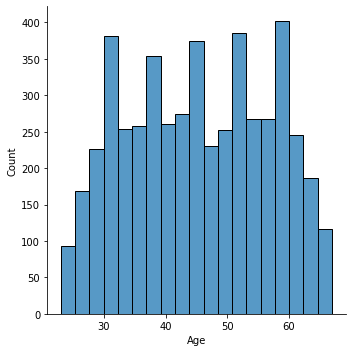

In [23]:
#visualization of the ages of customers
sns.displot(x='Age',data=df_bank)

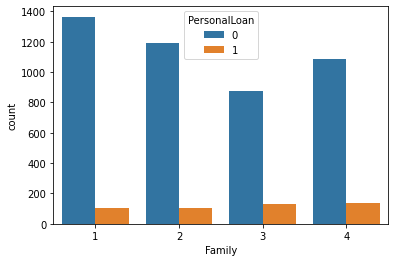

In [24]:
#visualization of the family dynamics
sns.countplot(x='Family', hue='PersonalLoan',data=df_bank)

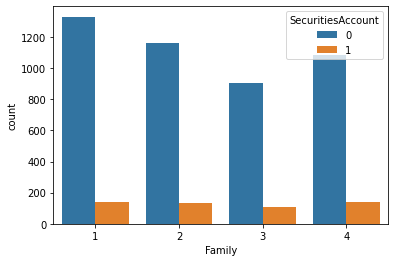

In [25]:
sns.countplot(x='Family', hue='SecuritiesAccount',data=df_bank)

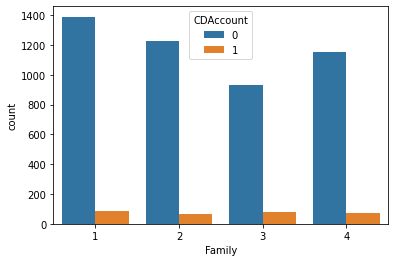

In [26]:
sns.countplot(x='Family', hue='CDAccount',data=df_bank)

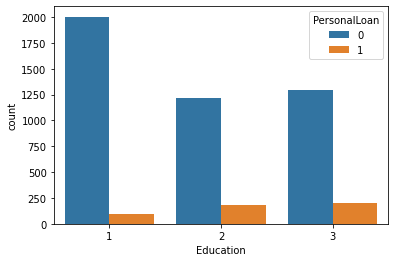

In [27]:
#looking closer at Education
sns.countplot(x='Education', hue='PersonalLoan', data=df_bank)

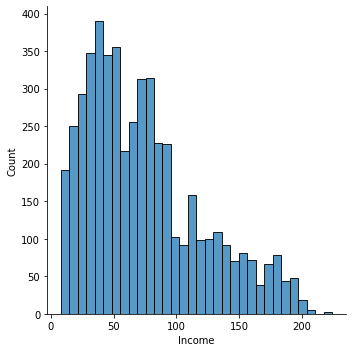

In [28]:
#income dist
sns.displot(df_bank['Income'])

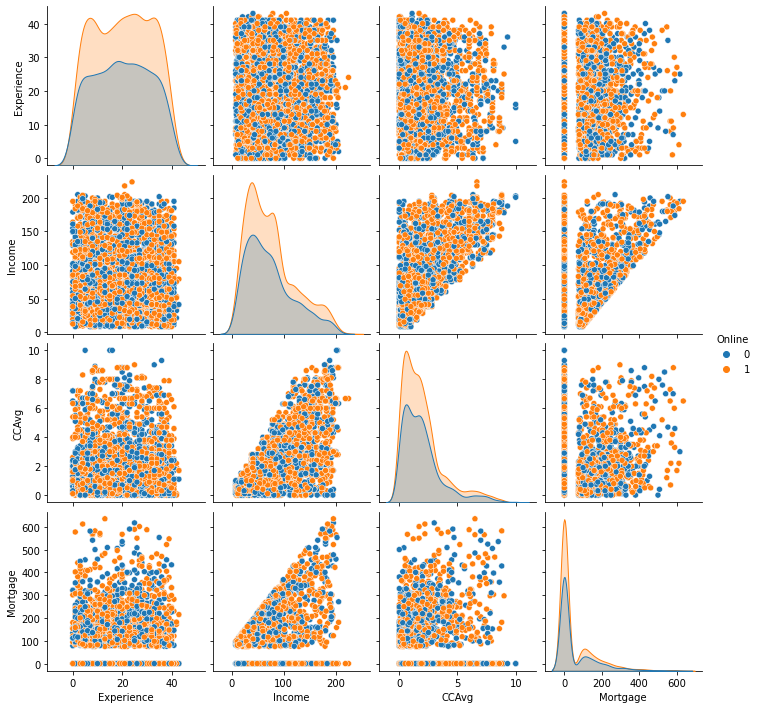

In [29]:
# a pair plot will help to see every numeric values correlation to survival
numeric = df_bank.iloc[: , [1,2,3,4,5,7,8,9,10,11,12,13]]
sns.pairplot(numeric.dropna(), hue='Online')

In [30]:
df_bank.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.13460,73.77420,1.93794,56.49880
std,11.46317,11.41519,46.03373,1.74766,101.71380
min,23.00000,0.00000,8.00000,0.00000,0.00000
25%,35.00000,10.00000,39.00000,0.70000,0.00000
50%,45.00000,20.00000,64.00000,1.50000,0.00000
75%,55.00000,30.00000,98.00000,2.50000,101.00000
max,67.00000,43.00000,224.00000,10.00000,635.00000


In [31]:
for column in category_col:
    print(df_bank[column].value_counts())
    print("#" * 40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Education, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda C

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

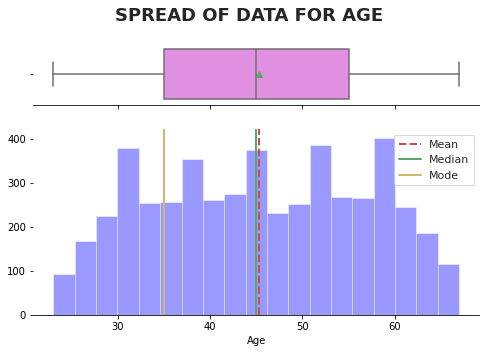

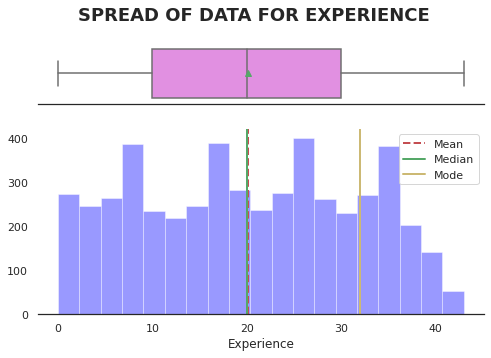

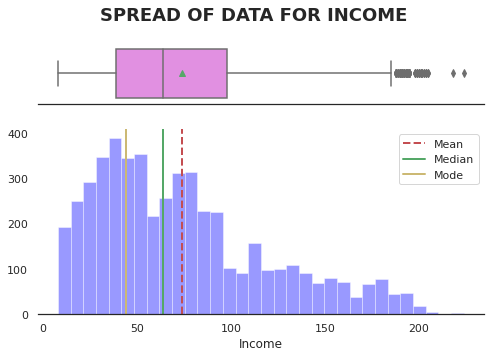

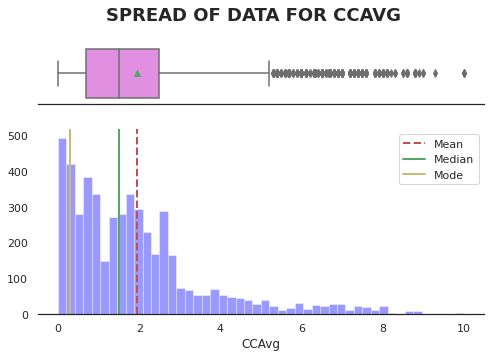

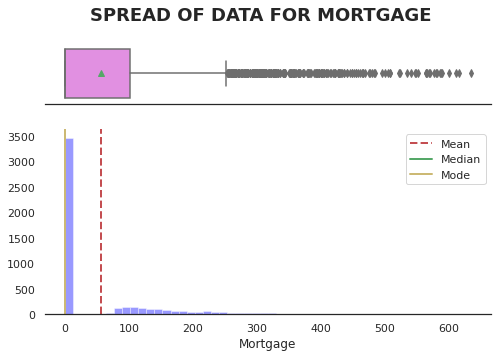

In [32]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_bank[list_col[i]])

In [33]:
# placing ages into certain levels
def age (age):
    if age <= 34:
        return 'Young'
    if age <= 49:
        return 'Younger middle age'
    if age <= 65:
        return 'Upper middle age'
    else:
        return 'elder'

df_bank['Age_category'] = df_bank['Age'].apply(age)

In [34]:
#sorting the income levels

df_bank["Income_group"] = pd.cut(
    x=df_bank["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

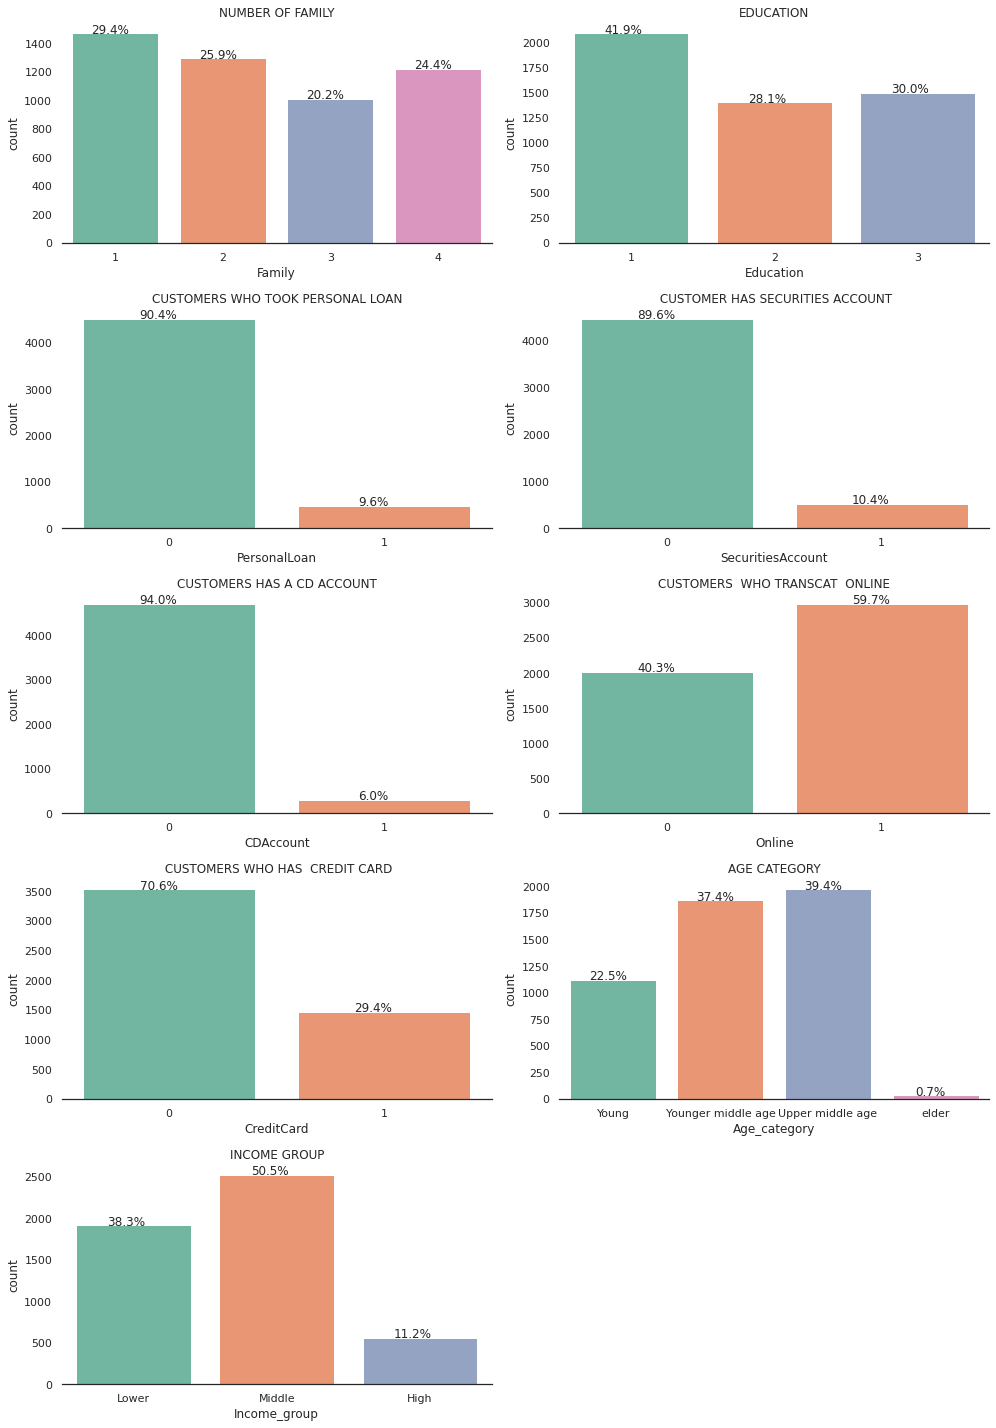

In [35]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Age_category','Income_group']

title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Age Category',"Income group"]          
plt.figure(figsize=(14,20))
sns.set_theme(style="white")

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_bank[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_bank[variable], data=df_bank)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_bank[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

In [36]:
# breaking into larger chunks the regions of the data
# source of counties comes from https://www.calbhbc.org/region-map-and-listing.html

counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

df_bank['Regions'] = df_bank['County'].map(counties)

In [37]:
df_bank.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Age_category         0
Income_group         0
Regions              1
dtype: int64

In [38]:
df_bank.dropna(inplace=True)

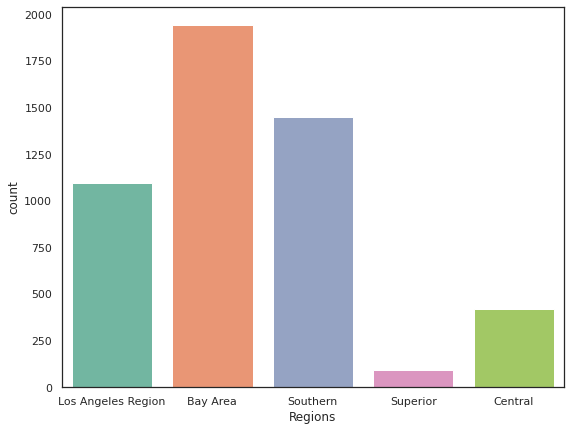

In [39]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_bank,x=df_bank['Regions'])

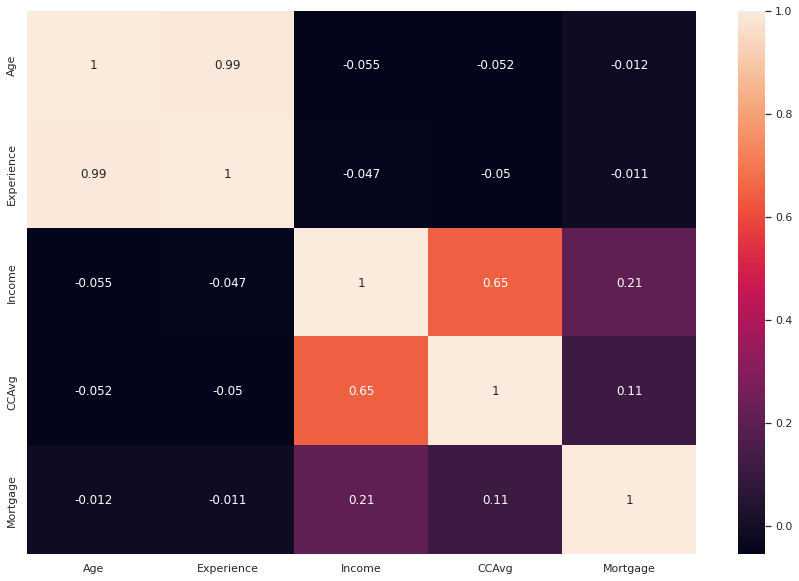

In [40]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_bank.corr(),annot=True)
plt.show()

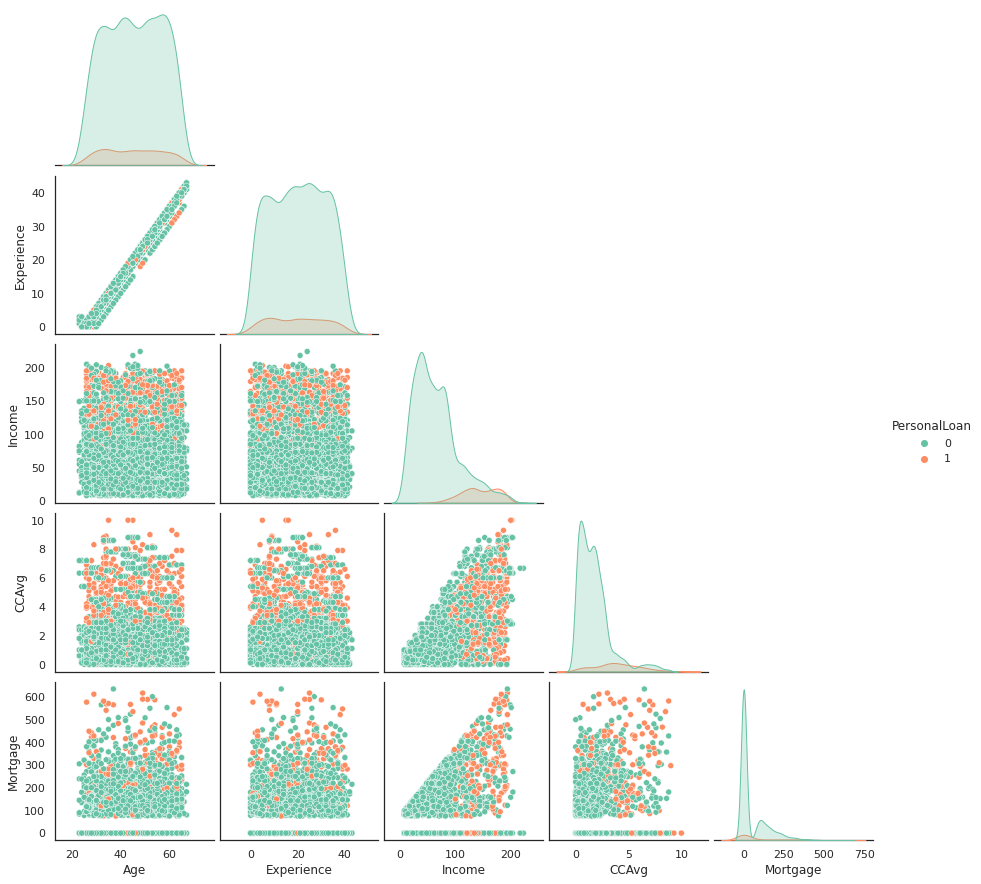

In [41]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df_bank, hue="PersonalLoan",corner=True)
plt.show()

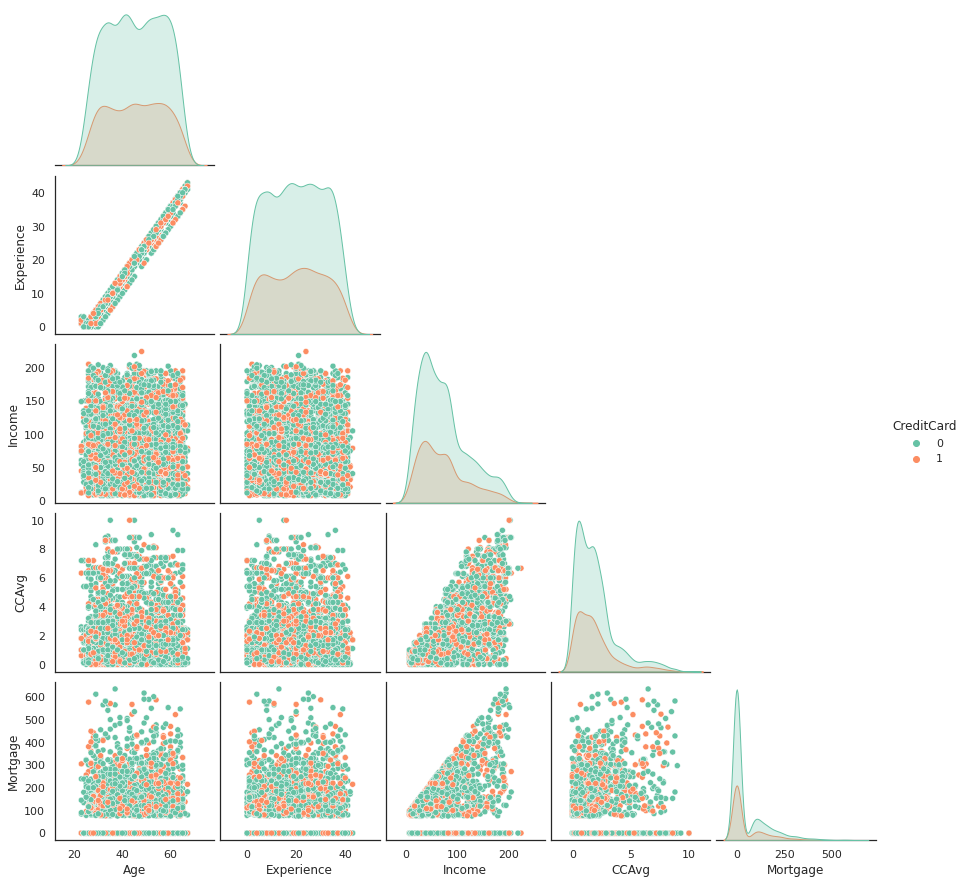

In [42]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df_bank, hue="CreditCard",corner=True)
plt.show()

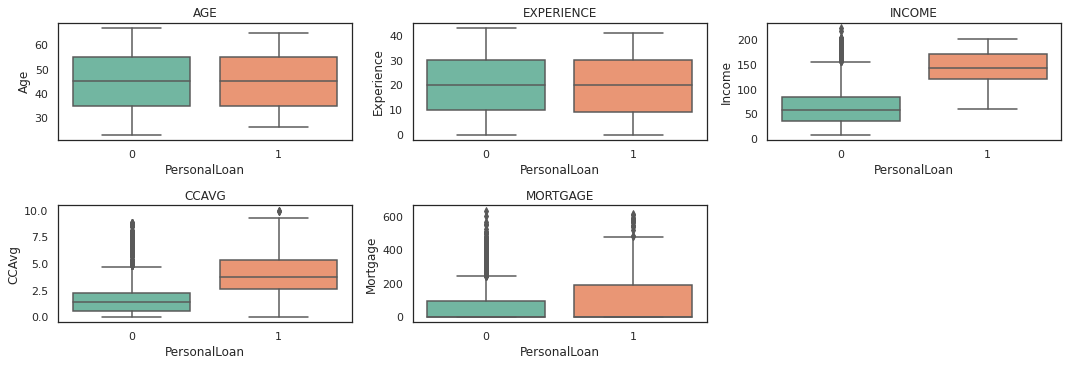

In [43]:
#looking closer at the columns that have numeric values

numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= df_bank[variable], data=df_bank)     
        #sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


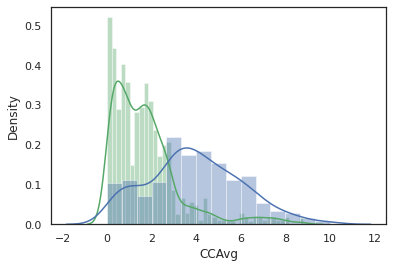

In [44]:
sns.distplot( df_bank[df_bank['PersonalLoan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df_bank[df_bank['PersonalLoan'] == 1]['CCAvg'], color = 'b')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


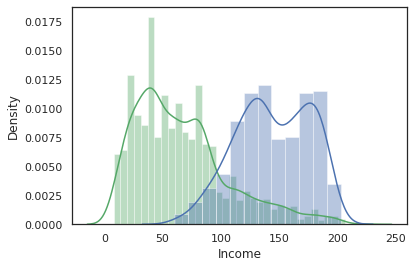

In [45]:
sns.distplot(df_bank[df_bank['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot(df_bank[df_bank['PersonalLoan'] == 1]['Income'], color = 'b')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


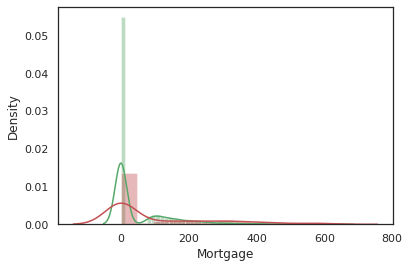

In [46]:
sns.distplot(df_bank[df_bank['PersonalLoan'] == 0]['Mortgage'], color = 'g')
sns.distplot(df_bank[df_bank['PersonalLoan'] == 1]['Mortgage'], color = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


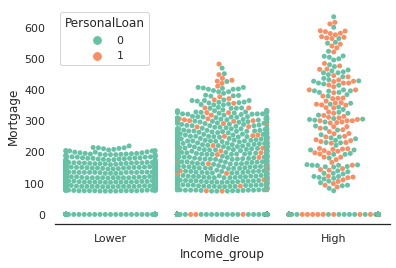

In [47]:
sns.swarmplot(x='Income_group',y='Mortgage',hue='PersonalLoan',data=df_bank)
sns.despine(top=True,right=True,left=True)

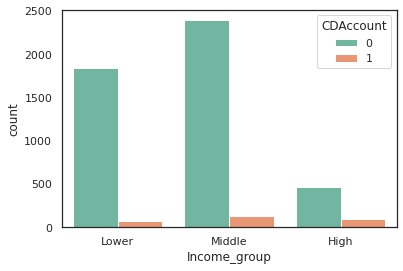

In [48]:
#closer look at income group and whether or not they have a CD Account

sns.countplot(data=df_bank, x= 'Income_group', hue='CDAccount')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


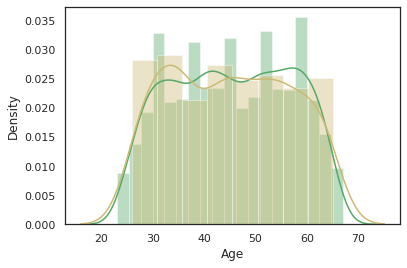

In [49]:
# looking at the Ages of individuals that have personal loans

sns.distplot(df_bank[df_bank['PersonalLoan'] == 0]['Age'], color = 'g')
sns.distplot(df_bank[df_bank['PersonalLoan'] == 1]['Age'], color = 'y')

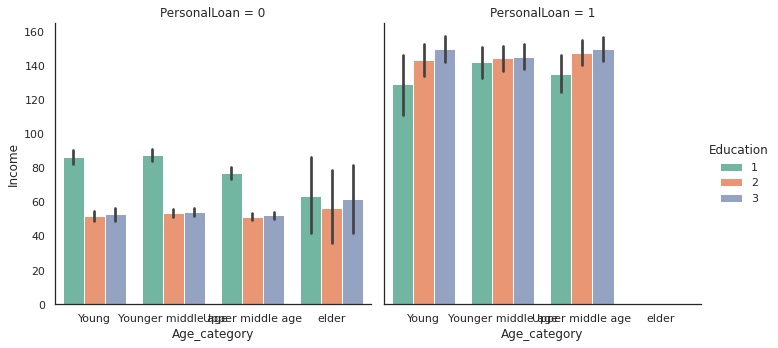

In [50]:
#looking at both the incomes and age groups that customers are within to figure out their education level and personal loan status

sns.catplot(y='Income',x='Age_category',hue='Education',kind='bar',col="PersonalLoan", data=df_bank)

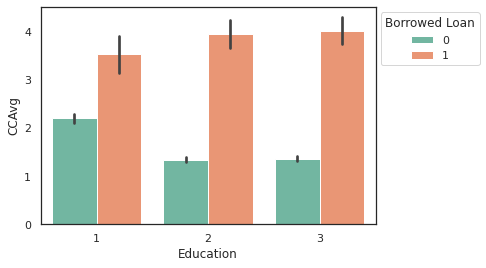

In [51]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=df_bank)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))

In [52]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df_bank['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_bank['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------
PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------
PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------
PersonalLoan     0    1   All
CDAccount                    
0           

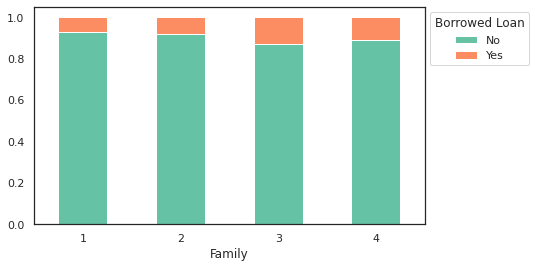

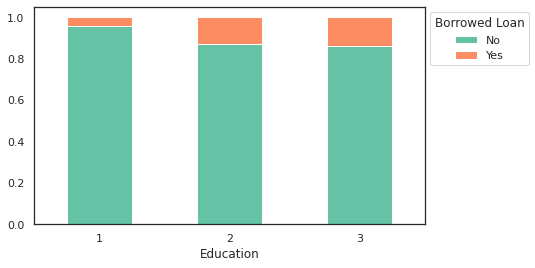

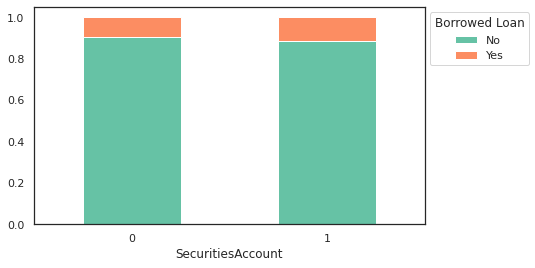

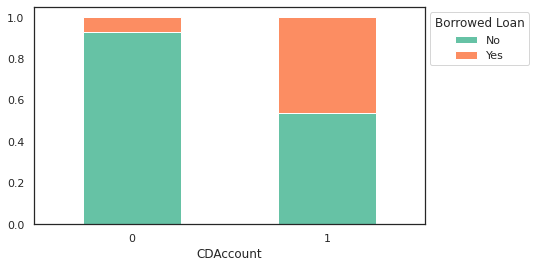

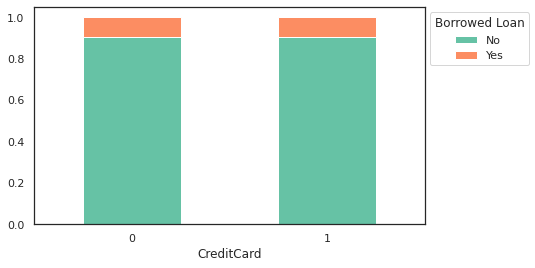

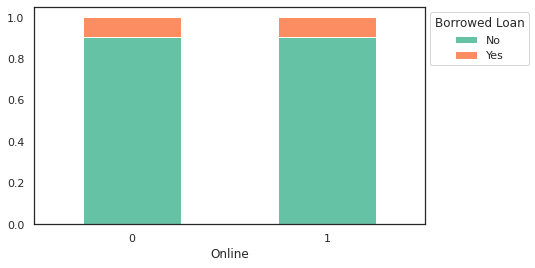

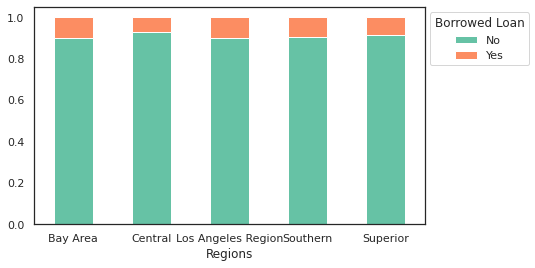

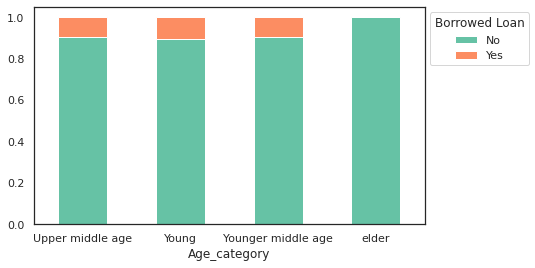

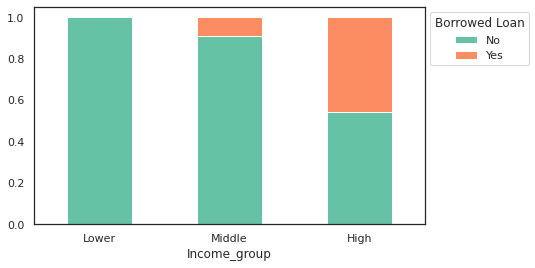

In [53]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Age_category','Income_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df_bank[variable])

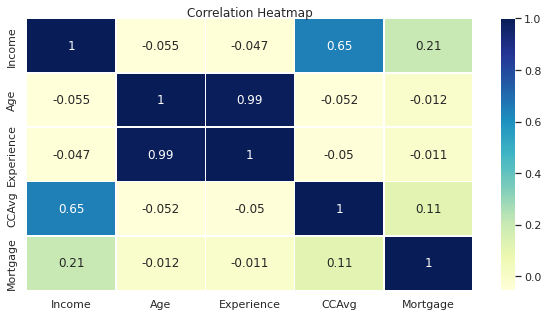

In [54]:
#visualization of numerical attributes

plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']

# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(df_bank[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

([<matplotlib.patches.Wedge at 0x7faa4ea37150>,
 [Text(-1.0503312798154913, 0.3268091226406516, ''),
  Text(1.0503312721659712, -0.3268091472254298, '')],
 [Text(-0.5729079708084497, 0.1782595214403554, '90.4%'),
  Text(0.5729079666359843, -0.1782595348502344, '9.6%')])

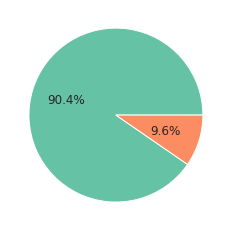

In [55]:
# this is to take a closer look at the distrubution of the target column

plt.pie(data=df_bank,x=df_bank["PersonalLoan"].value_counts(),autopct='%1.1f%%')

# Tree Regression


In [56]:
df_Decision = df_bank.copy()
df_Decision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Age_category       4999 non-null   object  
 15  Income_group       4999 non-null   category
 16  Region

In [59]:
df_Decision.drop(columns = ['Age_category', 'ZIPCode',"County",'Experience','Income_group'], inplace=True)

In [60]:
# Saving dataset before treating outliers for regression.
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

#oneHotCols=['Regions']
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)

# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42, stratify=y_dt)

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=42)

In [62]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
   

In [63]:
import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))
    make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict,"Confusion Matric on Test Data")

 Accuracy : Train : 1.0  Test: 0.9806666666666667
 Recall   : Train : 1.0  Test: 0.9027777777777778


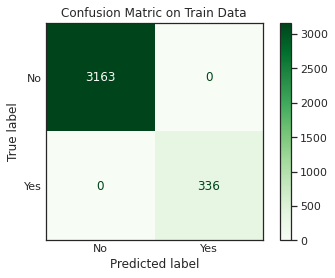

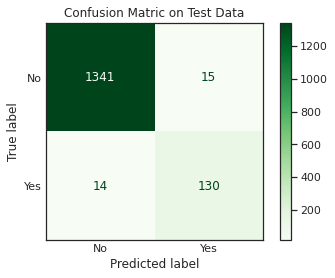

In [64]:
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)

In [65]:

column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


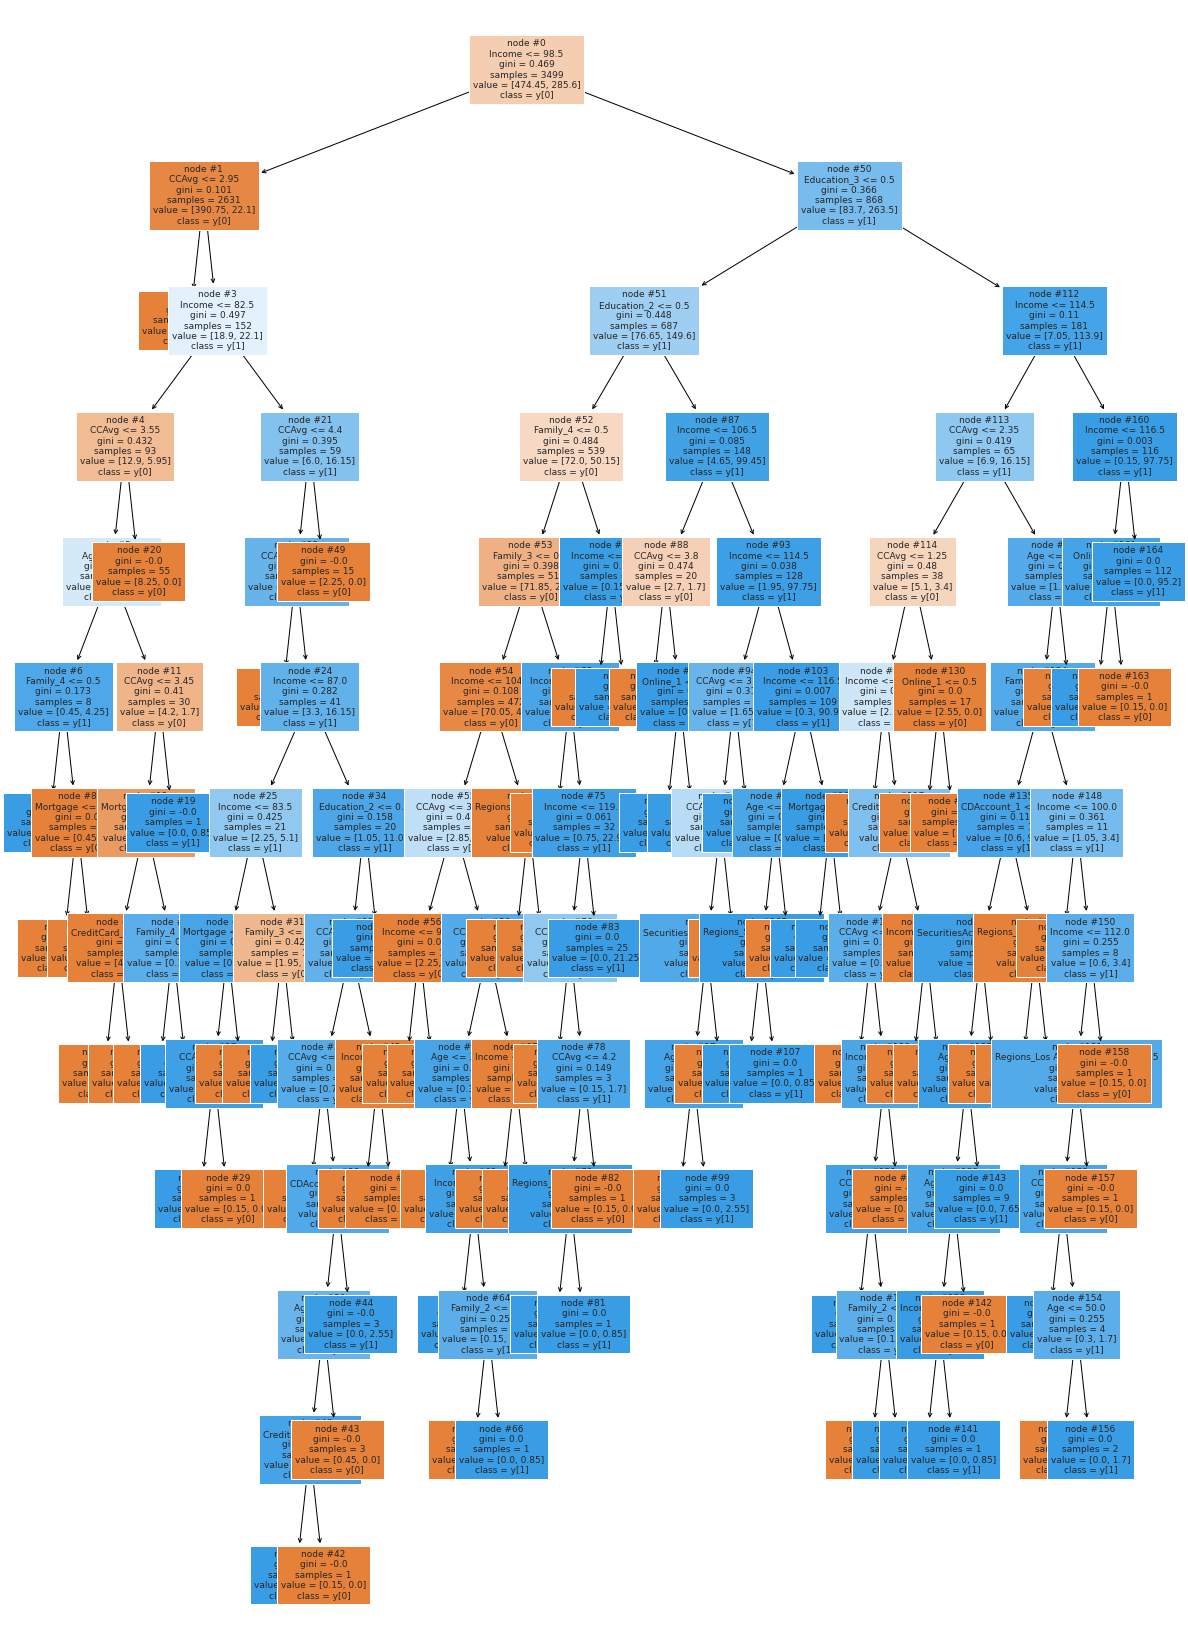

In [66]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [67]:
# Text report showing the decision tree rules -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.85, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 82.50
|   |   |   |--- CCAvg <= 3.55
|   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 4.25] class: 1
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- Mortgage <= 58.50
|   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  58.50
|   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Age >  37.50
|   |   |   |   |   |--- CCAvg <= 3.45
|   |   |   |   |   |   |--- Mortgage <= 169.50
|   |   |   |   |   |   |   |--- CreditCard_1 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [2.55, 0.00] class: 0
|   |   |   |   |   |   |   |--- CreditCard_1 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |   |--- Mortgage >  169.50
|   |   |   | 

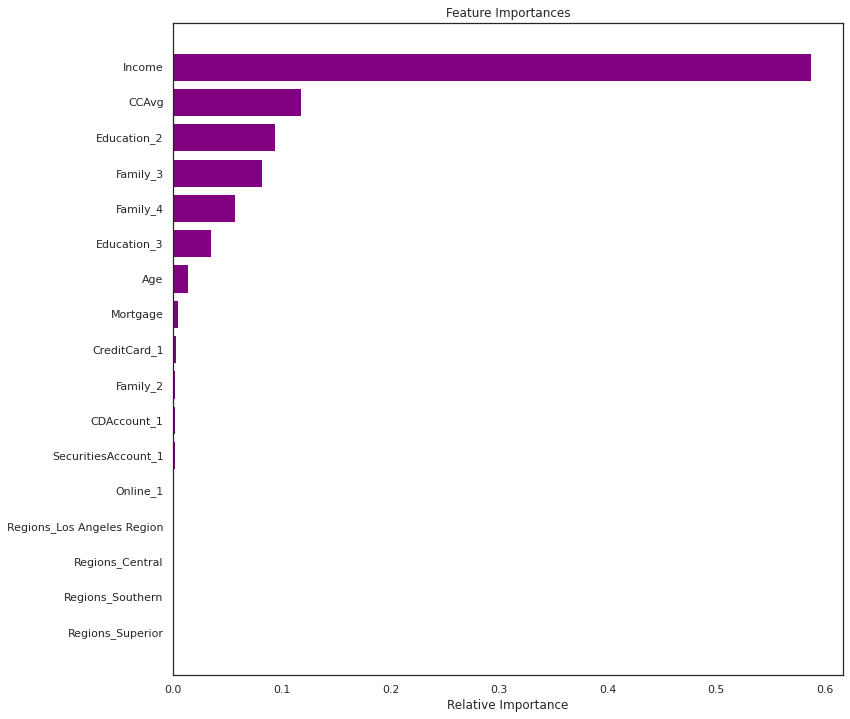

In [68]:
#plot out the feature importances 

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [69]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, min_samples_leaf=7,
                       random_state=42)

In [70]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

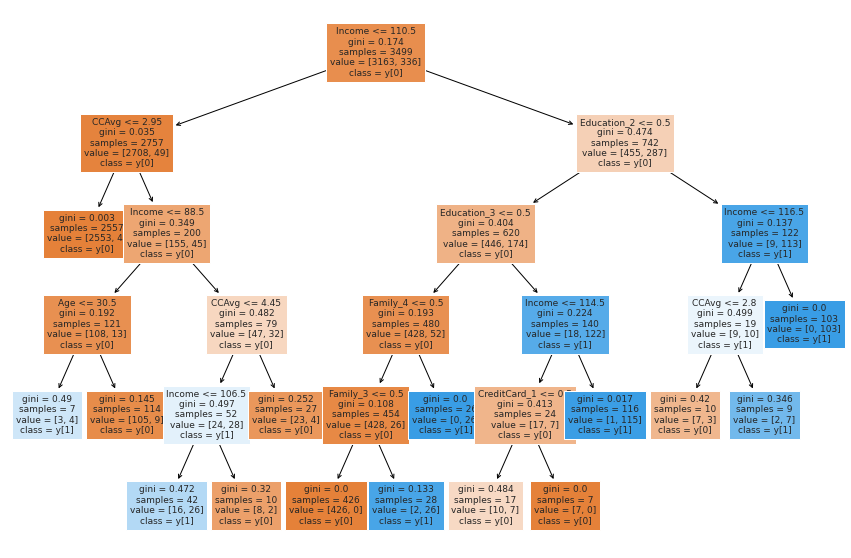

In [71]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

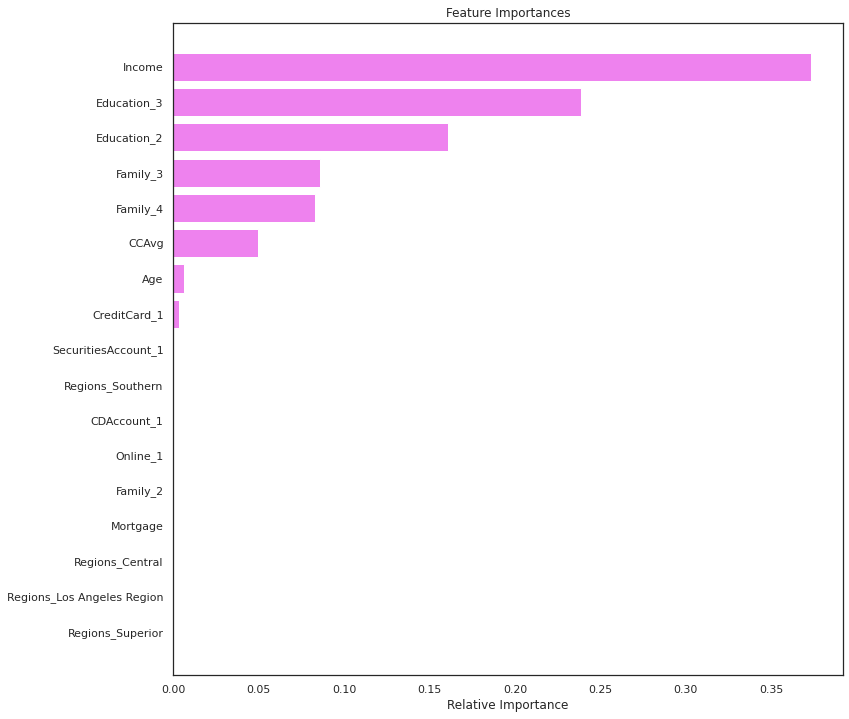

In [72]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.9848528150900258  Test: 0.9793333333333333
 Recall   : Train : 0.9136904761904762  Test: 0.9097222222222222


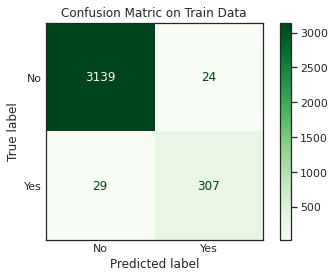

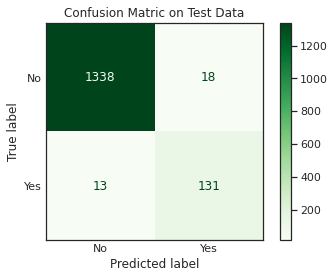

In [73]:
get_recall_score(estimator)